In [1]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Load the data
job = pd.read_csv('/Users/macbookair/Desktop/project/Resume_Analyser/resume-job-matching/data/job_title_des.csv')
resume = pd.read_csv('/Users/macbookair/Desktop/project/Resume_Analyser/resume-job-matching/data/UpdatedResumeDataSet.csv')

In [3]:
pd.set_option('max_colwidth', 800)

In [4]:
resume.head()

,Category,Resume
0,Data Science,"Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\..."
1,Data Science,"Education Details \r\nMay 2013 to May 2017 B.E UIT-RGPV\r\nData Scientist \r\n\r\nData Scientist - Matelabs\r\nSkill Details \r\nPython- Exprience - Less than 1 year months\r\nStatsmodels- Exprience - 12 months\r\nAWS- Exprience - Less than 1 year months\r\nMachine learning- Exprience - Less than 1 year months\r\nSklearn- Exprience - Less than 1 year months\r\nScipy- Exprience - Less than 1 year months\r\nKeras- Exprience - Less than 1 year monthsCompany Details \r\ncompany - Matelabs\r\ndescription - ML Platform for business professionals, dummies and enthusiasts.\r\n60/A Koramangala 5th block,\r\nAchievements/Tasks behind sukh sagar, Bengaluru,\r\nIndia Developed and deployed auto preprocessing steps of machine learning mainly missing value\r\ntreatmen..."
2,Data Science,"Areas of Interest Deep Learning, Control System Design, Programming in-Python, Electric Machinery, Web Development, Analytics Technical Activities q Hindustan Aeronautics Limited, Bangalore - For 4 weeks under the guidance of Mr. Satish, Senior Engineer in the hangar of Mirage 2000 fighter aircraft Technical Skills Programming Matlab, Python and Java, LabView, Python WebFrameWork-Django, Flask, LTSPICE-intermediate Languages and and MIPOWER-intermediate, Github (GitBash), Jupyter Notebook, Xampp, MySQL-Basics, Python Software Packages Interpreters-Anaconda, Python2, Python3, Pycharm, Java IDE-Eclipse Operating Systems Windows, Ubuntu, Debian-Kali Linux Education Details \r\nJanuary 2019 B.Tech. Electrical and Electronics Engineering Manipal Institute of Technology\r\nJanuary 2015 D..."
3,Data Science,"Skills â¢ R â¢ Python â¢ SAP HANA â¢ Tableau â¢ SAP HANA SQL â¢ SAP HANA PAL â¢ MS SQL â¢ SAP Lumira â¢ C# â¢ Linear Programming â¢ Data Modelling â¢ Advance Analytics â¢ SCM Analytics â¢ Retail Analytics â¢Social Media Analytics â¢ NLP Education Details \r\nJanuary 2017 to January 2018 PGDM Business Analytics Great Lakes Institute of Management & Illinois Institute of Technology\r\nJanuary 2013 Bachelor of Engineering Electronics and Communication Bengaluru, Karnataka New Horizon College of Engineering, Bangalore Visvesvaraya Technological University\r\nData Science Consultant \r\n\r\nConsultant - Deloitte USI\r\nSkill Details \r\nLINEAR PROGRAMMING- Exprience - 6 months\r\nRETAIL- Exprience - 6 months\r\nRETAIL MARKETING- Exprience - 6 months\r\nSCM- Exprience - 6 mo..."
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridabad, Haryana\r\nData Science internship \r\n\r\n\r\nSkill Details \r\nData Structure- Exprience - Less than 1 year months\r\nC- Exprience - Less than 1 year months\r\nData Analysis- Exprience - Less than 1 year months\r\nPython- Exprience - Less than 1 year months\r\nCore Java- Exprience - Less than 1 year months\r\nDatabase Management- Exprience - Less than 1 year monthsCompany Details \r\ncompany - Itechpower\r\ndescription -"


In [5]:
job.head()

,Unnamed: 0,Job Title,Job Description
0,0,Flutter Developer,"We are looking for hire experts flutter developer. So you are eligible this post then apply your resume.\nJob Types: Full-time, Part-time\nSalary: ₹20,000.00 - ₹40,000.00 per month\nBenefits:\nFlexible schedule\nFood allowance\nSchedule:\nDay shift\nSupplemental Pay:\nJoining bonus\nOvertime pay\nExperience:\ntotal work: 1 year (Preferred)\nHousing rent subsidy:\nYes\nIndustry:\nSoftware Development\nWork Remotely:\nTemporarily due to COVID-19"
1,1,Django Developer,PYTHON/DJANGO (Developer/Lead) - Job Code(PDJ - 04)\nStrong Python experience in API development (REST/RPC).\nExperience working with API Frameworks (Django/flask).\nExperience evaluating and improving the efficiency of programs in a Linux environment.\nAbility to effectively handle multiple tasks with a high level of accuracy and attention to detail.\nGood verbal and written communication skills.\nWorking knowledge of SQL.\nJSON experience preferred.\nGood knowledge in automated unit testing using PyUnit.
2,2,Machine Learning,"Data Scientist (Contractor)\n\nBangalore, IN\n\nResponsibilities\n\nWe are looking for a capable data scientist to join the Analytics team, reporting locally in India Bangalore. This person’s responsibilities include research, design and development of Machine Learning and Deep Learning algorithms to tackle a variety of Fraud oriented challenges. The data scientist will work closely with software engineers and program managers to deliver end-to-end products, including: data collection in big scale and analysis, exploring different algorithmic approaches, model development, assessment and validation – all the way through production.\n\nQualifications\n\nAt least 3 years of hands-on development of complex Machine Learning models using modern frameworks and tools, ideally Python based.\nS..."
3,3,iOS Developer,"JOB DESCRIPTION:\n\nStrong framework outside of iOS is always a plus\n\niOS experience and generalist engineers with backgrounds in related technologies is a plus\n\nA disciplined approach to development, documentation and file structure\n\nStrong visual design sense and excellent taste\n\nA constant desire to improve, learn more and take things higher\n\nAn excellent understanding of networking, mobile network issues, concurrency and threading\n\nExperience working with internationalized apps\n\nRESPONSIBILITIES\nDesign and build advanced applications for the iOS platform.\nCollaborate with cross-functional teams to define, design, and ship new features..\nWork on bug fixing and improving application performance.\nContinuously discover, evaluate, and implement new technologies to maxi..."
4,4,Full Stack Developer,job responsibility full stack engineer – react role make impact petsmart transforming engineering team meet need rapidly changing retail environment role foundational helping build craft petsmart ’ prowess making react j native key framework across mobile web property working across web mobile application part building amazing mobile first customer experience impact customer store digital channel goal responsibility include act full stack developer across petsmart ’ various web mobile solution full stack engineer help build petsmart ’ competency using react j native across mobile web property partner web engineering team strategy share component across application best practice new advancement react community work product ux team review design concept offer suggestion decrease complexi...


By peeking into the text, we notice that there are non-alphanumeric characters, numbers, and backslashes that need to be cleaned in the text.

In [6]:
resume.shape

(962, 2)

In [7]:
job.shape

(2277, 3)

In [8]:
resume.columns , job.columns

(Index(['Category', 'Resume'], dtype='object'),
 Index(['Unnamed: 0', 'Job Title', 'Job Description'], dtype='object'))

In [9]:
resume.Category.value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

In [10]:
job.rename(columns={'Job Title': 'Job_title'}, inplace=True)
job.rename(columns={'Job Description': 'Job_description'}, inplace=True)
job.Job_title.value_counts()

JavaScript Developer      166
Java Developer            161
Software Engineer         160
Node js developer         160
iOS Developer             159
PHP Developer             156
Flutter Developer         155
DevOps Engineer           155
Django Developer          152
Machine Learning          152
Backend Developer         147
Network Administrator     145
Database Administrator    139
Full Stack Developer      138
Wordpress Developer       132
Name: Job_title, dtype: int64

In [11]:
len(resume.Category.value_counts()), len(job.Job_title.value_counts())

(25, 15)

* Out of 25 different categories, Java Developer class is the largest class with 84 resumes, whereas Advocates class is the smallest with only 20 resumes.
* Out of 15 different job categories, JavaScript Developer class is the largest class with 166 posts, whereas Wordpress Developer class is the smallest with only 132 posts.

In [12]:
resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [13]:
job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       2277 non-null   int64 
 1   Job_title        2277 non-null   object
 2   Job_description  2277 non-null   object
dtypes: int64(1), object(2)
memory usage: 53.5+ KB


In [14]:
#Handling with null value
resume.isnull().sum() , job.isnull().sum()

(Category    0
 Resume      0
 dtype: int64,
 Unnamed: 0         0
 Job_title          0
 Job_description    0
 dtype: int64)

There is no missing value in our datasets which is good for the model.

#### Visualisation

[Text(0.5, 1.0, 'Resume Category')]

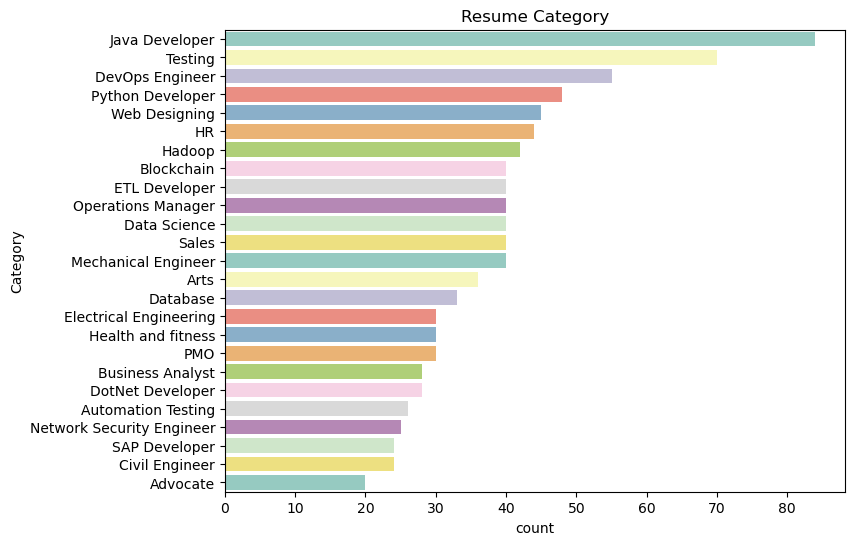

In [15]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.countplot(y="Category" , palette="Set3", data=resume, order = resume['Category'].value_counts().index).set(title='Resume Category')

[Text(0.5, 1.0, 'Job Post')]

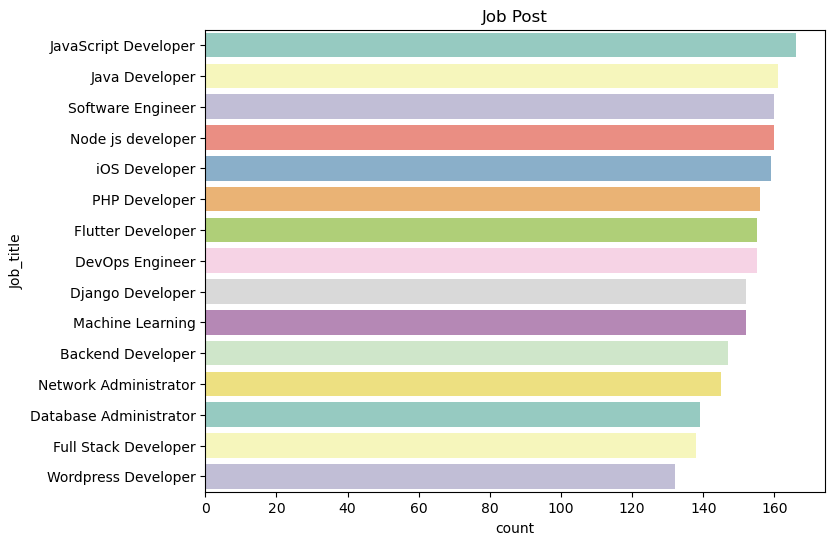

In [16]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.countplot(y="Job_title" , palette="Set3", data=job, order = job['Job_title'].value_counts().index).set(title='Job Post')

In [17]:
#Review before cleaning
resume["Resume"][1]

'Education Details \r\nMay 2013 to May 2017 B.E   UIT-RGPV\r\nData Scientist \r\n\r\nData Scientist - Matelabs\r\nSkill Details \r\nPython- Exprience - Less than 1 year months\r\nStatsmodels- Exprience - 12 months\r\nAWS- Exprience - Less than 1 year months\r\nMachine learning- Exprience - Less than 1 year months\r\nSklearn- Exprience - Less than 1 year months\r\nScipy- Exprience - Less than 1 year months\r\nKeras- Exprience - Less than 1 year monthsCompany Details \r\ncompany - Matelabs\r\ndescription - ML Platform for business professionals, dummies and enthusiasts.\r\n60/A Koramangala 5th block,\r\nAchievements/Tasks behind sukh sagar, Bengaluru,\r\nIndia                               Developed and deployed auto preprocessing steps of machine learning mainly missing value\r\ntreatment, outlier detection, encoding, scaling, feature selection and dimensionality reduction.\r\nDeployed automated classification and regression model.\r\nlinkedin.com/in/aditya-rathore-\r\nb4600b146        

In [18]:
job["Job_description"][1]

'PYTHON/DJANGO (Developer/Lead) - Job Code(PDJ - 04)\nStrong Python experience in API development (REST/RPC).\nExperience working with API Frameworks (Django/flask).\nExperience evaluating and improving the efficiency of programs in a Linux environment.\nAbility to effectively handle multiple tasks with a high level of accuracy and attention to detail.\nGood verbal and written communication skills.\nWorking knowledge of SQL.\nJSON experience preferred.\nGood knowledge in automated unit testing using PyUnit.'

#### Text Cleaning

In [19]:
#Print the punctuation
from string import punctuation
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [20]:
#Build the text cleaning function
import re
import nltk

In [21]:
#Test
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
print("Stopwords in English:", list(stop_words)[:10])  # Display first 10 stopwords

Stopwords in English: ['mightn', 'when', "don't", 'there', 'both', 'most', "you'll", 'mustn', 'we', 'about']


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/macbookair/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from nltk.corpus import wordnet
nltk.download('wordnet')
nltk.download('omw-1.4')

# Synsets for "phone"
synsets = wordnet.synsets('phone')
print(synsets[0].definition())


electronic equipment that converts sound into electrical signals that can be transmitted over distances and then converts received signals back into sounds


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/macbookair/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/macbookair/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [23]:
# Test removing special characters
text = "Hello, World! 123 :)"
cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
print("Original:", text)
print("Cleaned:", cleaned_text)

Original: Hello, World! 123 :)
Cleaned: Hello World 123 


In [24]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

text = "This is a simple sentence for testing purposes."
tokens = word_tokenize(text)
filtered_tokens = [word for word in tokens if word.lower() not in stopwords.words('english')]

print("Original Tokens:", tokens)
print("Filtered Tokens:", filtered_tokens)

Original Tokens: ['This', 'is', 'a', 'simple', 'sentence', 'for', 'testing', 'purposes', '.']
Filtered Tokens: ['simple', 'sentence', 'testing', 'purposes', '.']


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/macbookair/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/macbookair/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [25]:
#After tokenize the string, then we can apply the stopword removal step

In [26]:
#Lemmatization
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

word = "eating"
print("Lemmatized:", lemmatizer.lemmatize(word, pos='v'))  # Verb form

Lemmatized: eat


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/macbookair/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


##### Reusable Text Cleaning Function